In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Loading dataset
df = pd.read_csv("/content/marketing_campaign_dataset.csv")


In [ ]:
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


# **DATA PREPROCESSING**

In [ ]:
# Converting Acquisition_Cost from string (with currency symbols) to float
df["Acquisition_Cost"] = df["Acquisition_Cost"].replace('[\\$,]', '', regex=True).astype(float)

In [ ]:
# Step 1: Converting 'Duration' from "30 days" to integer
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
# Step 3: Converting 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Extracting Year-Month for time series analysis
df['YearMonth'] = df['Date'].dt.to_period('M')

In [ ]:
# Step 4: Droping duplicate rows if any
df = df.drop_duplicates()

In [ ]:
# Step 5: Checking for missing values and clean empty strings
df = df.replace('', pd.NA)
df = df.dropna()  # Droping rows with any missing values


In [ ]:
# Ensuring numeric columns are in correct format
df['ROI'] = pd.to_numeric(df['ROI'])
df['Conversion_Rate'] = pd.to_numeric(df['Conversion_Rate'])
df['Clicks'] = pd.to_numeric(df['Clicks'])
df['Impressions'] = pd.to_numeric(df['Impressions'])

In [ ]:

# Standardize categorical columns
categorical_cols = ['Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used',
                    'Location', 'Language', 'Customer_Segment']
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.str.lower().str.strip())


# Applying One-Hot Encoding on categorical variables
# Step 4: One-hot encode ALL object/categorical columns
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols)

# Showing a preview of the one-hot encoded DataFrame
df.head()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date,YearMonth,...,Language_english,Language_french,Language_german,Language_mandarin,Language_spanish,Customer_Segment_fashionistas,Customer_Segment_foodies,Customer_Segment_health & wellness,Customer_Segment_outdoor adventurers,Customer_Segment_tech enthusiasts
0,1,30,0.04,16174.0,6.29,506,1922,6,2021-01-01,2021-01,...,False,False,False,False,True,False,False,True,False,False
1,2,60,0.12,11566.0,5.61,116,7523,7,2021-01-02,2021-01,...,False,False,True,False,False,True,False,False,False,False
2,3,30,0.07,10200.0,7.18,584,7698,1,2021-01-03,2021-01,...,False,True,False,False,False,False,False,False,True,False
3,4,60,0.11,12724.0,5.55,217,1820,7,2021-01-04,2021-01,...,False,False,False,True,False,False,False,True,False,False
4,5,15,0.05,16452.0,6.50,379,4201,3,2021-01-05,2021-01,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
dataset = df

# **DATA** **VISUALIZATION**

<ipython-input-62-a71024893cb0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_per_campaign.index, y=roi_per_campaign.values, palette='Blues')


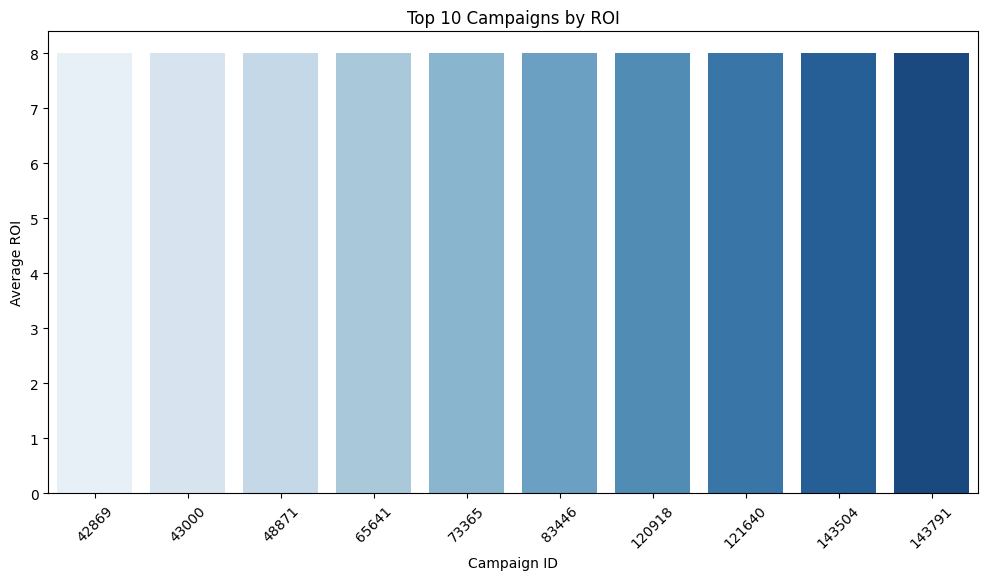

In [ ]:
# Generate the third visualization: ROI per Campaign (Bar Chart)
plt.figure(figsize=(12, 6))

# Get the top 10 campaigns by average ROI
roi_per_campaign = df.groupby('Campaign_ID')['ROI'].mean().sort_values(ascending=False)[:10]

# Plot the bar chart
sns.barplot(x=roi_per_campaign.index, y=roi_per_campaign.values, palette='Blues')

# Labels and title
plt.title('Top 10 Campaigns by ROI')
plt.xlabel('Campaign ID')
plt.ylabel('Average ROI')
plt.xticks(rotation=45)
plt.show()


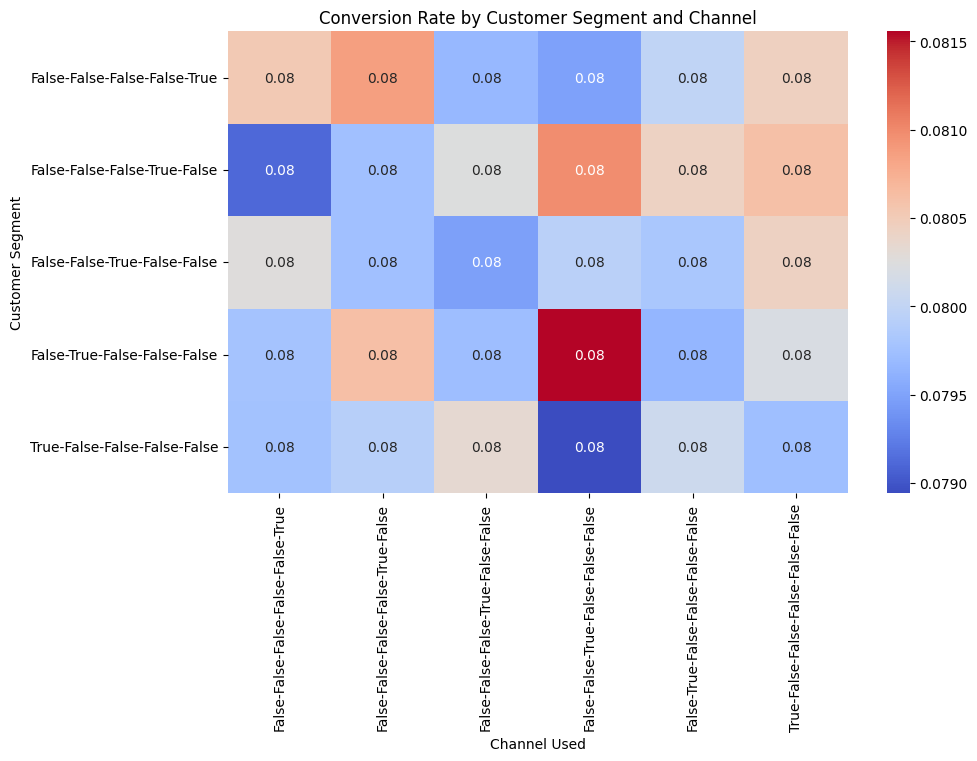

In [ ]:
# Demographic Segmentation Performance (Heatmap)
# Geting the one-hot encoded columns for 'Customer_Segment' and 'Channel_Used'
customer_segment_cols = [col for col in df.columns if 'Customer_Segment_' in col]
channel_used_cols = [col for col in df.columns if 'Channel_Used_' in col]

# Creating the pivot table using the encoded columns
pivot_table = df.pivot_table(
    index=customer_segment_cols,
    columns=channel_used_cols,
    values="Conversion_Rate",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Conversion Rate by Customer Segment and Channel")
plt.ylabel("Customer Segment")
plt.xlabel("Channel Used")
plt.show()

<ipython-input-64-9bb10a13bc67>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Campaign_ID', y='ROI', data=top_bottom_campaigns, palette=['green', 'red'])


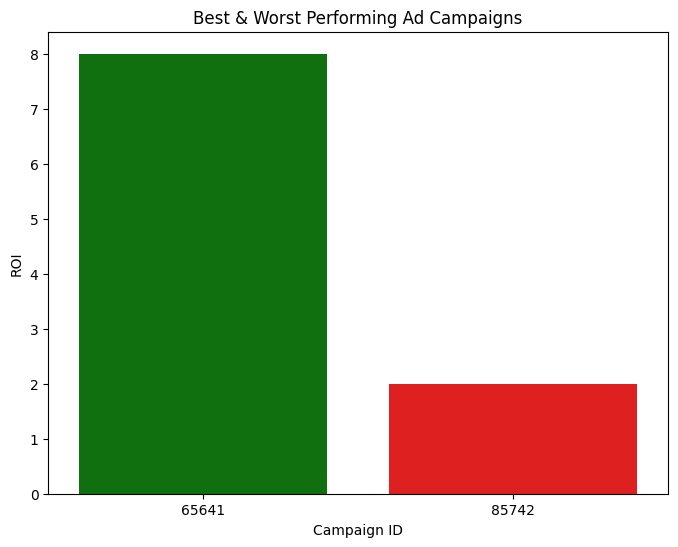

In [ ]:
# Generating the second visualization: Best & Worst Performing Ad Campaigns (Based on ROI)
plt.figure(figsize=(8, 6))

# Finding the best and worst campaigns based on average ROI
top_bottom_campaigns = df.groupby('Campaign_ID')['ROI'].mean().sort_values(ascending=False).iloc[[0, -1]].reset_index()

# Plot the best and worst campaigns
sns.barplot(x='Campaign_ID', y='ROI', data=top_bottom_campaigns, palette=['green', 'red'])

# Labels and title
plt.title('Best & Worst Performing Ad Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('ROI')
plt.show()


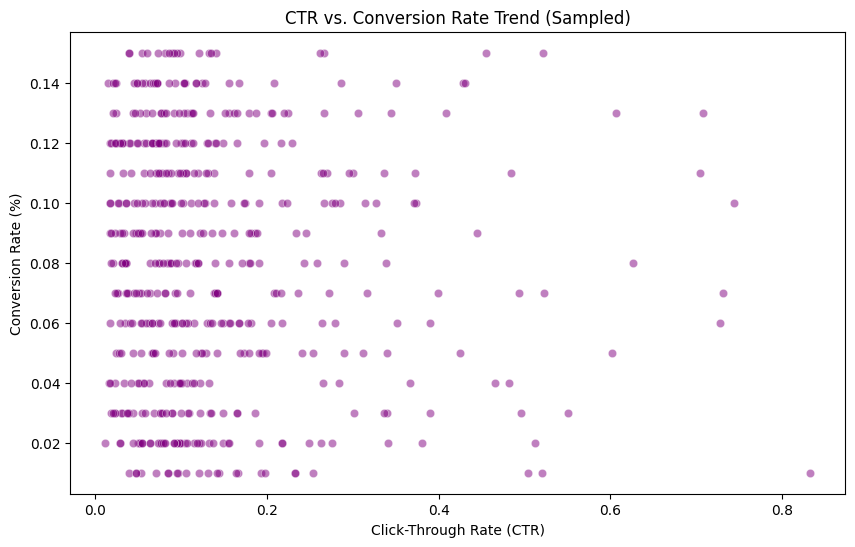

In [ ]:
# fourth visualization: CTR vs. Conversion Rate Trend (using a sample)
plt.figure(figsize=(10, 6))

# Sampling a subset of the data for faster visualization
sample_df = df.sample(n=500, random_state=42)

if 'CTR' not in sample_df.columns:
    sample_df['CTR'] = sample_df['Clicks'] / sample_df['Impressions']

# Ploting CTR vs. Conversion Rate
sns.scatterplot(x=sample_df['CTR'], y=sample_df['Conversion_Rate'], color='purple', alpha=0.5)

# Labels and title
plt.title('CTR vs. Conversion Rate Trend (Sampled)')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Conversion Rate (%)')
plt.show()


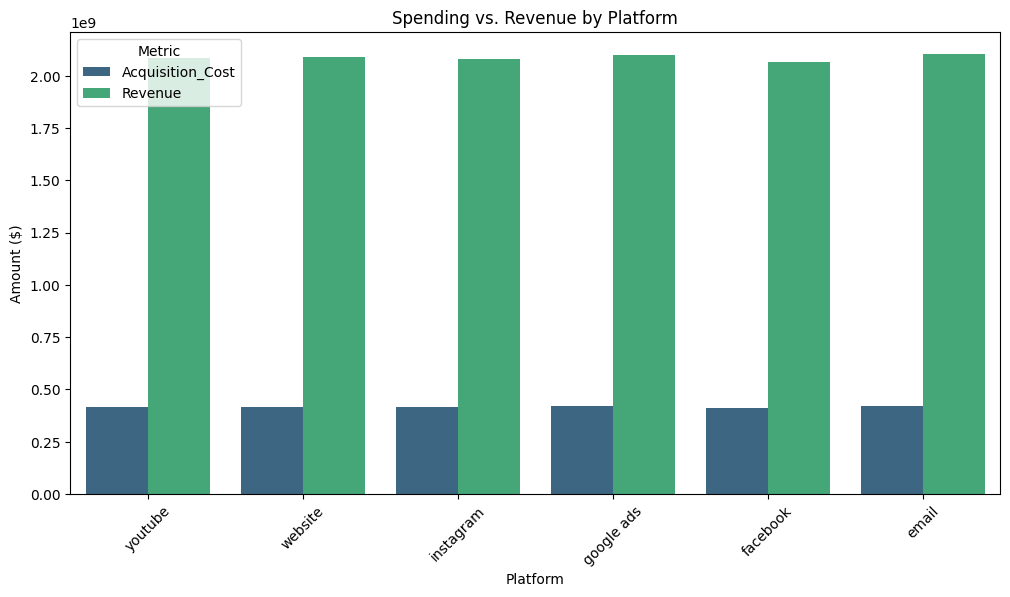

In [ ]:
# Spending vs. Revenue by Platform (Stacked Bar Chart)
df["Acquisition_Cost"] = df["Acquisition_Cost"].replace(r'[\$,]', '', regex=True).astype(float)
df["Revenue"] = df["ROI"] * df["Acquisition_Cost"]

#  columns that start with 'Channel_Used_'
channel_used_cols = [col for col in df.columns if col.startswith('Channel_Used_')]

#  columns and sum 'Acquisition_Cost' and 'Revenue'
platform_data = df.groupby(channel_used_cols)[["Acquisition_Cost", "Revenue"]].sum().reset_index()

platform_data_melted = platform_data.melt(id_vars=channel_used_cols, value_vars=["Acquisition_Cost", "Revenue"], var_name="Metric", value_name="Amount")


# Create a summary column for Channel_Used based on one-hot encoded columns
for col in channel_used_cols:
    platform_data_melted.loc[platform_data_melted[col] == 1, 'Channel_Used'] = col.split('_')[-1]  # Extract channel name

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Channel_Used", y="Amount", hue="Metric", data=platform_data_melted, palette="viridis")
plt.xlabel("Platform")
plt.ylabel("Amount ($)")
plt.title("Spending vs. Revenue by Platform")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

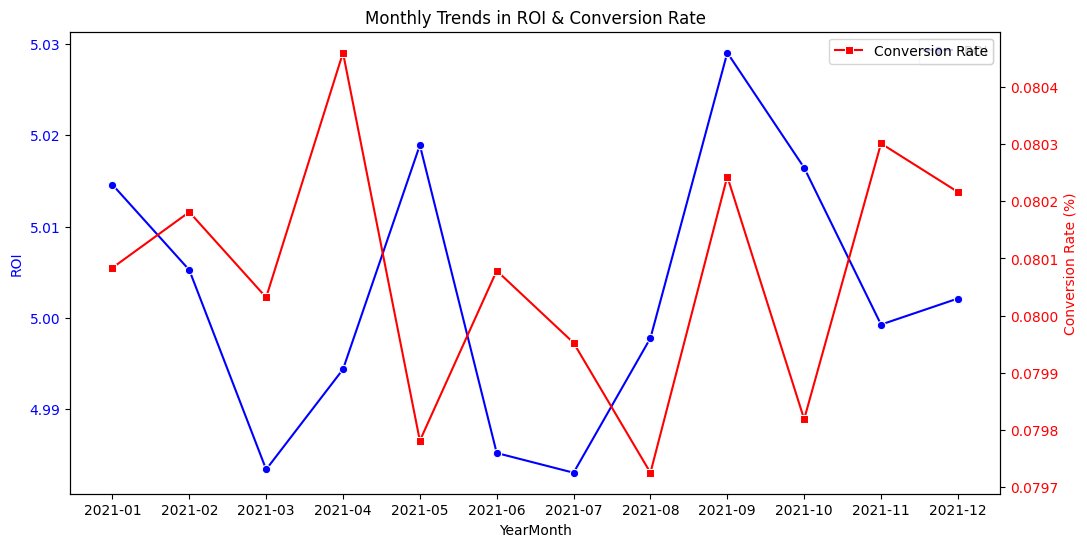

In [ ]:
#  first visualization: Monthly Trends in ROI & Conversion Rate
plt.figure(figsize=(12, 6))

# Group by month and calculate mean ROI and Conversion Rate
monthly_trends = df.groupby('YearMonth')[['ROI', 'Conversion_Rate']].mean().reset_index()

# Plot ROI
ax = sns.lineplot(x=monthly_trends['YearMonth'].astype(str), y=monthly_trends['ROI'], marker='o', color='blue', label='ROI')
ax.set_ylabel('ROI', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

#  second y-axis for Conversion Rate
ax2 = ax.twinx()
sns.lineplot(x=monthly_trends['YearMonth'].astype(str), y=monthly_trends['Conversion_Rate'], marker='s', color='red', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Conversion Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Labels and title
plt.title('Monthly Trends in ROI & Conversion Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# **Model training and prediction**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Feature-Target Split
X = dataset.drop(columns=['ROI', 'YearMonth', 'Date'])  # Features (Exclude 'YearMonth' and 'Date')
y = dataset['ROI']               # Target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking for and drop any remaining datetime columns in X_train
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
if len(datetime_cols) > 0:
    X_train = X_train.drop(columns=datetime_cols)
    X_test = X_test.drop(columns=datetime_cols)  # Droping from X_test as well for consistency

# Step 4: Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluating Model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(6.203952099999984e-05, 0.999979400714337)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


columns_to_drop = []
for col in ['Campaign_ID', 'Date']:
    if col in df.columns:
        columns_to_drop.append(col)

if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)

# Define features and target
X = df.drop(columns='ROI')
y = df['ROI']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['uint8', 'object']).columns.tolist() # Assuming one-hot encoded are uint8

# Create preprocessor
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # sparse=False for RandomForest
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Random Forest Regressor pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))
])


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model

pipeline.fit(X_train, y_train)
_

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred)**0.5  # Calculate RMSE without 'squared' argument
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 0.01
MAE: 0.01
R² Score: 1.00


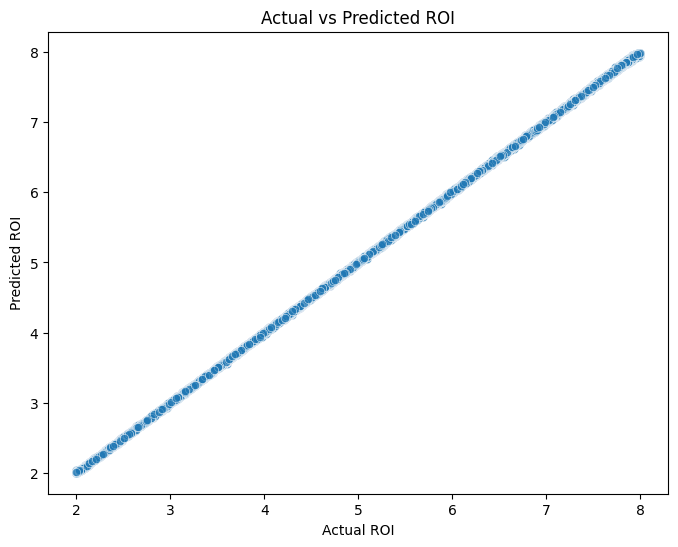

In [ ]:
# Scatter plot of actual vs predicted ROI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual ROI")
plt.ylabel("Predicted ROI")
plt.title("Actual vs Predicted ROI")
plt.show()